# LSTM vs shift time

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

[ 8400 10165  9482 ..., 11621 11273 10840]
1008


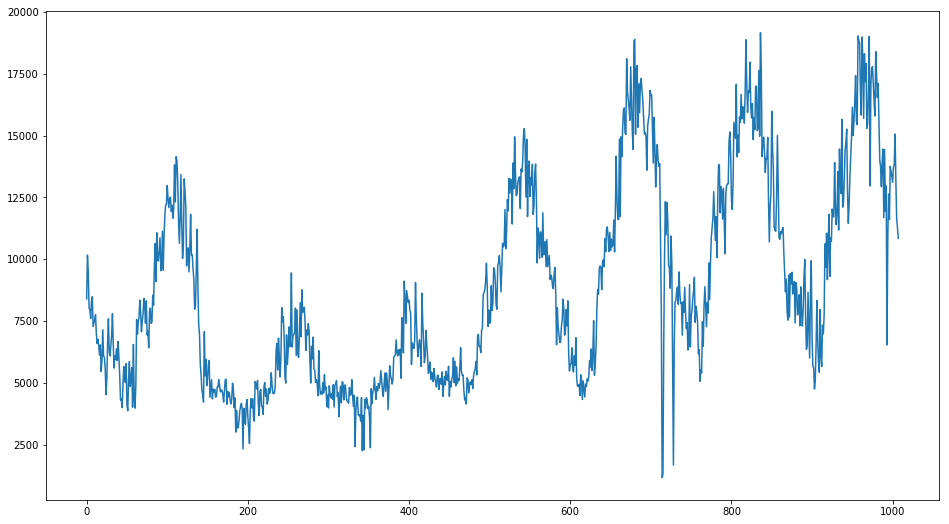

In [21]:
# Load data, wc98: day6 -> day12
dt = pd.read_csv('../data/wc98_day6-12_10min.csv', names=['requests'])
data = np.copy(dt['requests'].values)
print(data)
print(len(data))
plt.figure(figsize=(16, 9))
plt.plot(data)
plt.show()

In [66]:
# Data train: day6 to day10
# Data test: day11, day12
train_size = 144*5

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
data = data.astype('float32')
data_scale = scaler.fit_transform(data.reshape(len(data), 1))
train_data = data_scale[:train_size]
test_data = data_scale[train_size:]

train_x = np.copy(train_data[:len(train_data)-1])
train_y = np.copy(train_data[1:])
test_x = np.copy(test_data[:len(test_data) - 1])
test_y = np.copy(test_data[1:])

In [67]:
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(719, 1) (719, 1)
(287, 1) (287, 1)


## LSTM 

In [68]:
# Create LSTM model and train
model = Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

train_x = train_x.reshape(train_x.shape[0], 1, train_x.shape[1])
test_x = test_x.reshape(test_x.shape[0], 1, test_x.shape[1])
model.fit(train_x, train_y, epochs=100, batch_size=1)

Epoch 1/100
719/719 [==============================] - 1s - loss: 0.0394     
Epoch 2/100
719/719 [==============================] - 1s - loss: 0.0124     
Epoch 3/100
719/719 [==============================] - 1s - loss: 0.0051     
Epoch 4/100
719/719 [==============================] - 1s - loss: 0.0035     
Epoch 5/100
719/719 [==============================] - 1s - loss: 0.0034     
Epoch 6/100
719/719 [==============================] - 1s - loss: 0.0034     
Epoch 7/100
719/719 [==============================] - 1s - loss: 0.0034     
Epoch 8/100
719/719 [==============================] - 1s - loss: 0.0034     
Epoch 9/100
719/719 [==============================] - 1s - loss: 0.0034     
Epoch 10/100
719/719 [==============================] - 1s - loss: 0.0034     
Epoch 11/100
719/719 [==============================] - 1s - loss: 0.0034     
Epoch 12/100
719/719 [==============================] - 1s - loss: 0.0034     
Epoch 13/100
719/719 [==============================] - 1s - 

In [69]:
# Predict
train_pred = model.predict(train_x)
test_pred = model.predict(test_x)

# Invert predictions
train_pred = scaler.inverse_transform(train_pred)
train_y = scaler.inverse_transform(train_y)
test_pred = scaler.inverse_transform(test_pred)
test_y = scaler.inverse_transform(test_y)

# RMSE
print('RMSE')
train_score = np.sqrt(mean_squared_error(train_y[:,0], train_pred[:,0]))
test_score = np.sqrt(mean_squared_error(test_y[:,0], test_pred[:,0]))
print('Train: %f' % (train_score))
print('Test: %f' % (test_score))

RMSE
Train: 1039.357178
Test: 1561.733276


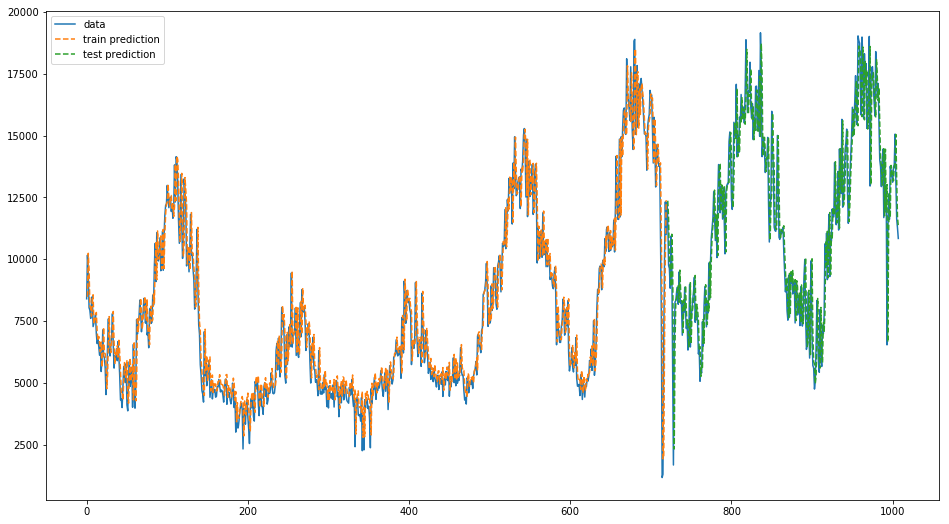

In [84]:
# Plot
train_pred_plot = np.empty_like(data)
train_pred_plot[:] = np.nan
train_pred_plot[1:len(train_pred)+1] = train_pred[:,0]
test_pred_plot = np.empty_like(data)
test_pred_plot[:] = np.nan
test_pred_plot[len(train_pred)+2:] = test_pred[:,0] 

plt.figure(figsize=(16, 9))
plt.plot(data, label='data')
plt.plot(train_pred_plot, '--', label='train prediction')
plt.plot(test_pred_plot, '--', label='test prediction')
plt.legend()
plt.show()

## K shift time

In [85]:
# K shift time algorithm
# Predict x[t] by the value of x[t-k]
# Caculate RMSE for k = 1, 2...

def k_shift_rmse(data, size, k):
    return np.sqrt(mean_squared_error(data[len(data)-size:], data[len(data)-size-k:len(data)-k]))

In [86]:
for i in range(1, 11):
    print('k = %d, RMSE: %f' % (i, k_shift_rmse(data=data, size=test_size, k=i)))

k = 1, RMSE: 1591.847534
k = 2, RMSE: 1893.957764
k = 3, RMSE: 2009.420532
k = 4, RMSE: 2100.764160
k = 5, RMSE: 2231.040283
k = 6, RMSE: 2358.201660
k = 7, RMSE: 2440.234863
k = 8, RMSE: 2459.181641
k = 9, RMSE: 2580.237793
k = 10, RMSE: 2760.394287
